In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Full_Data_Nubi_Drive_NEW.csv')

In [3]:
psy=pd.read_csv('Psychometric_Data.csv')

In [4]:
psy=pd.get_dummies(psy, columns=['Gender'])

In [5]:
station=df[df['Trip'].isnull()]
station2 = station[station['BPM'].notna()]
df_12=station2[station2['P_ID']=='P12']
df_13=station2[station2['P_ID']=='P13']
df_15=station2[station2['P_ID']=='P15']
df_17=station2[station2['P_ID']=='P17']
df_18=station2[station2['P_ID']=='P18']
df_19=station2[station2['P_ID']=='P19']
df_20=station2[station2['P_ID']=='P20']
df_22=station2[station2['P_ID']=='P22']
df_23=station2[station2['P_ID']=='P23']
df_24=station2[station2['P_ID']=='P24']
df_27=station2[station2['P_ID']=='P27']

arr=[df_12,df_13,df_15,df_17,df_18,df_19,df_20,df_22,df_23,df_24,df_27]
new_arr=[]

for elem in arr:
    avg=elem['BPM'].mean()
    new_arr.append(avg)
new_df=pd.DataFrame()
new_df['P_ID']=['P12','P13','P15','P17','P18','P19','P20','P22','P23','P24','P27']
new_df['Averages']=new_arr

In [6]:
df_2=df.drop(['Time', 'latitudes', 'longitudes', 'Time_Second'], axis=1)
corr_matrix=df_2.corr().abs()
half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
dropped_columns = [column for column in half_matrix.columns if any(half_matrix[column] > 0.8)]
df_2.drop(dropped_columns, axis=1, inplace=True)

/var/folders/41/rlmz0mh15dx9_qw9xxbv4mq00000gn/T/ipykernel_5010/1899529646.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [7]:
df_2=pd.get_dummies(df_2, columns=['Trip','Day','Src_Weather_Info','Des_Weather_Info'])

In [8]:
df_12=df_2[df_2['P_ID']=='P12']
df_13=df_2[df_2['P_ID']=='P13']
df_15=df_2[df_2['P_ID']=='P15']
df_17=df_2[df_2['P_ID']=='P17']
df_18=df_2[df_2['P_ID']=='P18']
df_19=df_2[df_2['P_ID']=='P19']
df_20=df_2[df_2['P_ID']=='P20']
df_22=df_2[df_2['P_ID']=='P22']
df_23=df_2[df_2['P_ID']=='P23']
df_24=df_2[df_2['P_ID']=='P24']
df_27=df_2[df_2['P_ID']=='P27']

arr=[df_12,df_13,df_15,df_17,df_18,df_19,df_20,df_22,df_23,df_24,df_27]
counter=0
for elem in arr:
    elem['BPM']=elem['BPM']-new_arr[counter]
    counter+=1
    
df_new=pd.concat([df_12, df_13, df_15, df_17, df_18, df_19, df_20, df_22, df_23, df_24, df_27])
df_2=df_new

/var/folders/41/rlmz0mh15dx9_qw9xxbv4mq00000gn/T/ipykernel_5010/3465505260.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem['BPM']=elem['BPM']-new_arr[counter]


In [9]:
df_2=pd.merge(df_2, psy, on='P_ID')

In [10]:
df_2=df_2.dropna(axis=0)

In [11]:
df_2=df_2.drop('P_ID', axis=1)

In [12]:
df_2

,Speed_MPH,ATP,BP_Hg,BPM,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Trip_Trip1,...,Des_Weather_Info_Thunderstorm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male
8906,20.500000,16.900000,28.9,-6.080198,1.70738,24.79,84.04,1014.0,10.36,1,...,0,27,45,8,9,9,8,6,1,0
8911,9.500000,20.000000,28.9,-3.080198,1.43925,25.85,84.04,1014.0,10.36,1,...,0,27,45,8,9,9,8,6,1,0
8912,22.000000,16.600000,28.9,-6.080198,1.70738,24.79,84.04,1014.0,10.36,1,...,0,27,45,8,9,9,8,6,1,0
8920,0.333333,16.900000,28.9,2.919802,2.42528,28.40,84.04,1014.0,10.36,1,...,0,27,45,8,9,9,8,6,1,0
8933,3.333333,17.300000,28.9,5.919802,2.42528,28.40,84.04,1014.0,10.36,1,...,0,27,45,8,9,9,8,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064695,15.333333,16.866667,29.5,-7.230071,0.00000,45.61,93.45,1017.0,10.36,0,...,0,27,32,9,7,9,4,7,0,1
2064700,20.000000,11.000000,29.5,-5.230071,0.00000,45.61,93.45,1017.0,10.36,0,...,0,27,32,9,7,9,4,7,0,1
2064704,15.000000,10.350000,29.5,-8.230071,0.00000,45.61,93.45,1017.0,10.36,0,...,0,27,32,9,7,9,4,7,0,1
2064710,4.500000,14.050000,29.5,-3.230071,0.00000,45.61,93.45,1017.0,10.36,0,...,0,27,32,9,7,9,4,7,0,1


In [13]:
temp=df_2['BPM']
df_2=df_2.drop(['BPM'], axis=1)
Y=temp.values
X=df_2.values
orig=X

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [16]:
import keras.backend as K
import numpy as np

def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

In [17]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))


def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [31]:
def baseline_model():
    model = Sequential()
    model.add(Dense(13, input_shape=(44,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(44, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[soft_acc,rmse,mse, r_square])
    return model

In [32]:
model=baseline_model()
results=model.fit(X_train, y_train, epochs=200, batch_size=32,
shuffle=True, verbose=2)

Epoch 1/200
826/826 - 1s - loss: 73.9465 - soft_acc: 0.0500 - rmse: 6.7427 - mse: 73.9465 - r_square: 0.0205 - 1s/epoch - 1ms/step
Epoch 2/200
826/826 - 1s - loss: 62.8891 - soft_acc: 0.0548 - rmse: 6.1063 - mse: 62.8891 - r_square: 0.1639 - 615ms/epoch - 745us/step
Epoch 3/200
826/826 - 1s - loss: 56.3988 - soft_acc: 0.0575 - rmse: 5.7569 - mse: 56.3988 - r_square: 0.2474 - 597ms/epoch - 723us/step
Epoch 4/200
826/826 - 1s - loss: 52.9904 - soft_acc: 0.0605 - rmse: 5.5600 - mse: 52.9904 - r_square: 0.2933 - 581ms/epoch - 704us/step
Epoch 5/200
826/826 - 1s - loss: 50.0984 - soft_acc: 0.0622 - rmse: 5.3809 - mse: 50.0984 - r_square: 0.3341 - 629ms/epoch - 762us/step
Epoch 6/200
826/826 - 1s - loss: 48.6273 - soft_acc: 0.0646 - rmse: 5.2925 - mse: 48.6273 - r_square: 0.3511 - 623ms/epoch - 755us/step
Epoch 7/200
826/826 - 1s - loss: 47.9154 - soft_acc: 0.0645 - rmse: 5.2599 - mse: 47.9154 - r_square: 0.3572 - 588ms/epoch - 712us/step
Epoch 8/200
826/826 - 1s - loss: 46.8886 - soft_acc: 

Epoch 61/200
826/826 - 1s - loss: 39.8959 - soft_acc: 0.0750 - rmse: 4.7298 - mse: 39.8959 - r_square: 0.4651 - 587ms/epoch - 711us/step
Epoch 62/200
826/826 - 1s - loss: 39.5811 - soft_acc: 0.0751 - rmse: 4.7173 - mse: 39.5811 - r_square: 0.4691 - 581ms/epoch - 704us/step
Epoch 63/200
826/826 - 1s - loss: 39.1953 - soft_acc: 0.0742 - rmse: 4.6910 - mse: 39.1953 - r_square: 0.4739 - 592ms/epoch - 717us/step
Epoch 64/200
826/826 - 1s - loss: 39.4351 - soft_acc: 0.0756 - rmse: 4.7079 - mse: 39.4351 - r_square: 0.4699 - 586ms/epoch - 710us/step
Epoch 65/200
826/826 - 1s - loss: 38.9593 - soft_acc: 0.0747 - rmse: 4.6759 - mse: 38.9593 - r_square: 0.4766 - 586ms/epoch - 709us/step
Epoch 66/200
826/826 - 1s - loss: 38.9399 - soft_acc: 0.0761 - rmse: 4.6734 - mse: 38.9399 - r_square: 0.4764 - 587ms/epoch - 710us/step
Epoch 67/200
826/826 - 1s - loss: 38.4332 - soft_acc: 0.0733 - rmse: 4.6489 - mse: 38.4332 - r_square: 0.4846 - 580ms/epoch - 702us/step
Epoch 68/200
826/826 - 1s - loss: 38.6569

Epoch 121/200
826/826 - 1s - loss: 34.7146 - soft_acc: 0.0792 - rmse: 4.4061 - mse: 34.7146 - r_square: 0.5314 - 584ms/epoch - 707us/step
Epoch 122/200
826/826 - 1s - loss: 34.9462 - soft_acc: 0.0783 - rmse: 4.4225 - mse: 34.9462 - r_square: 0.5284 - 593ms/epoch - 717us/step
Epoch 123/200
826/826 - 1s - loss: 34.9518 - soft_acc: 0.0778 - rmse: 4.4261 - mse: 34.9518 - r_square: 0.5276 - 580ms/epoch - 702us/step
Epoch 124/200
826/826 - 1s - loss: 34.8973 - soft_acc: 0.0797 - rmse: 4.4279 - mse: 34.8973 - r_square: 0.5296 - 579ms/epoch - 700us/step
Epoch 125/200
826/826 - 1s - loss: 35.1455 - soft_acc: 0.0793 - rmse: 4.4383 - mse: 35.1455 - r_square: 0.5279 - 584ms/epoch - 706us/step
Epoch 126/200
826/826 - 1s - loss: 35.1474 - soft_acc: 0.0785 - rmse: 4.4314 - mse: 35.1474 - r_square: 0.5268 - 581ms/epoch - 704us/step
Epoch 127/200
826/826 - 1s - loss: 36.0156 - soft_acc: 0.0800 - rmse: 4.4947 - mse: 36.0156 - r_square: 0.5133 - 586ms/epoch - 710us/step
Epoch 128/200
826/826 - 1s - loss:

Epoch 181/200
826/826 - 1s - loss: 34.0923 - soft_acc: 0.0772 - rmse: 4.3678 - mse: 34.0923 - r_square: 0.5418 - 593ms/epoch - 718us/step
Epoch 182/200
826/826 - 1s - loss: 35.1497 - soft_acc: 0.0756 - rmse: 4.4478 - mse: 35.1497 - r_square: 0.5292 - 580ms/epoch - 702us/step
Epoch 183/200
826/826 - 1s - loss: 33.9780 - soft_acc: 0.0795 - rmse: 4.3607 - mse: 33.9780 - r_square: 0.5448 - 583ms/epoch - 706us/step
Epoch 184/200
826/826 - 1s - loss: 34.1167 - soft_acc: 0.0799 - rmse: 4.3642 - mse: 34.1167 - r_square: 0.5424 - 599ms/epoch - 725us/step
Epoch 185/200
826/826 - 1s - loss: 34.3864 - soft_acc: 0.0825 - rmse: 4.3911 - mse: 34.3864 - r_square: 0.5362 - 582ms/epoch - 704us/step
Epoch 186/200
826/826 - 1s - loss: 33.8540 - soft_acc: 0.0796 - rmse: 4.3509 - mse: 33.8540 - r_square: 0.5464 - 588ms/epoch - 712us/step
Epoch 187/200
826/826 - 1s - loss: 34.0850 - soft_acc: 0.0783 - rmse: 4.3727 - mse: 34.0850 - r_square: 0.5429 - 697ms/epoch - 843us/step
Epoch 188/200
826/826 - 1s - loss:

In [33]:
model.evaluate(X_test, y_test)

407/407 [==============================] - 0s 790us/step - loss: 34.4215 - soft_acc: 0.0791 - rmse: 4.3262 - mse: 34.4215 - r_square: 0.5542


[34.421478271484375,
 0.07905098795890808,
 4.326239109039307,
 34.421478271484375,
 0.5541504621505737]

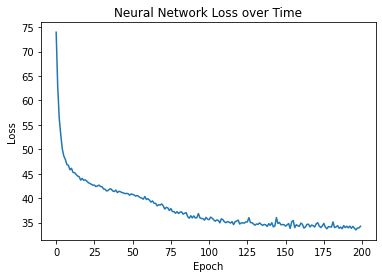

In [34]:
plt.plot(results.history['loss'])
plt.title('Neural Network Loss over Time')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

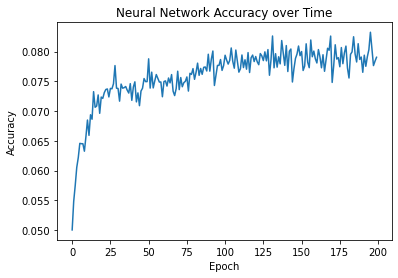

In [35]:
plt.plot(results.history['soft_acc'])
plt.title('Neural Network Accuracy over Time')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

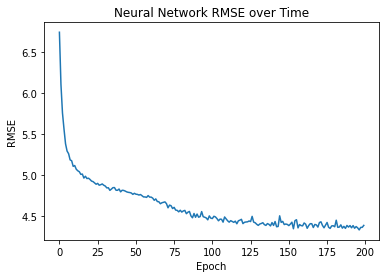

In [36]:
plt.plot(results.history['rmse'])
plt.title('Neural Network RMSE over Time')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.show()

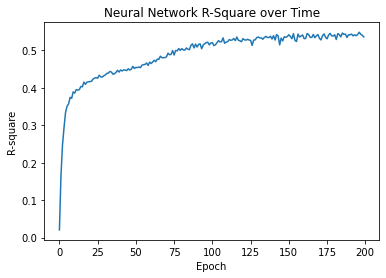

In [37]:
plt.plot(results.history['r_square'])
plt.title('Neural Network R-Square over Time')
plt.ylabel('R-square')
plt.xlabel('Epoch')
plt.show()

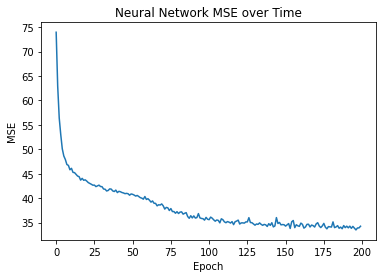

In [38]:
plt.plot(results.history['mse'])
plt.title('Neural Network MSE over Time')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()